In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os   
import re


In [30]:
path = "C:/Users/LENOVO/Desktop/MRS_DS&ML/data/ml-100k/"
movies = pd.read_csv(path + 'u.item', sep='|', encoding='latin-1',
                     names=['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
                            'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
                            'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
users = pd.read_csv(path + 'u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
genres = pd.read_csv(path + 'u.genre', sep='|', names=['genre', 'genre_id'], encoding='latin-1')

ratings = pd.read_csv(path + 'u.data', sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])

In [31]:
# Save as CSV
movies.to_csv("C:/Users/LENOVO/Desktop/MRS_DS&ML/data/movies.csv", index=False)
users.to_csv("C:/Users/LENOVO/Desktop/MRS_DS&ML/data/users.csv", index=False)
genres.to_csv("C:/Users/LENOVO/Desktop/MRS_DS&ML/data/genres.csv", index=False)
ratings.to_csv("C:/Users/LENOVO/Desktop/MRS_DS&ML/data/ratings.csv", index=False)

print("✅ All CSV files saved successfully!")


✅ All CSV files saved successfully!


In [44]:
movies = pd.read_csv('C:/Users/LENOVO/Desktop/MRS_DS&ML/data/movies.csv')
ratings = pd.read_csv('C:/Users/LENOVO/Desktop/MRS_DS&ML/data/ratings.csv')
genres = pd.read_csv('C:/Users/LENOVO/Desktop/MRS_DS&ML/data/genres.csv')
users = pd.read_csv('C:/Users/LENOVO/Desktop/MRS_DS&ML/data/users.csv')

In [45]:
print("Movies DataFrame: ")
print(movies.head())
print("\nRatings DataFrame: ")  
print(ratings.head())
print("\nGenres DataFrame: ")
print(genres.head())    
print("\nUsers DataFrame: ")


Movies DataFrame: 
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...        0         

In [46]:
print(movies.info())
print(ratings.info())
print(genres.info())    
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [50]:
#data preprocessing
#movies dataset
#drop unnesessary columns
#movies = movies.drop(columns=['video_release_date', 'imdb_url'])
movies.head

<bound method NDFrame.head of       movie_id                                      title release_date  \
0            1                           Toy Story (1995)  01-Jan-1995   
1            2                           GoldenEye (1995)  01-Jan-1995   
2            3                          Four Rooms (1995)  01-Jan-1995   
3            4                          Get Shorty (1995)  01-Jan-1995   
4            5                             Copycat (1995)  01-Jan-1995   
...        ...                                        ...          ...   
1677      1678                          Mat' i syn (1997)  06-Feb-1998   
1678      1679                           B. Monkey (1998)  06-Feb-1998   
1679      1680                       Sliding Doors (1998)  01-Jan-1998   
1680      1681                        You So Crazy (1994)  01-Jan-1994   
1681      1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996   

      unknown  Action  Adventure  Animation  Children's  Comedy  Crime  ...  \
0 

In [51]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      1682 non-null   int64 
 1   title         1682 non-null   object
 2   release_date  1681 non-null   object
 3   unknown       1682 non-null   int64 
 4   Action        1682 non-null   int64 
 5   Adventure     1682 non-null   int64 
 6   Animation     1682 non-null   int64 
 7   Children's    1682 non-null   int64 
 8   Comedy        1682 non-null   int64 
 9   Crime         1682 non-null   int64 
 10  Documentary   1682 non-null   int64 
 11  Drama         1682 non-null   int64 
 12  Fantasy       1682 non-null   int64 
 13  Film-Noir     1682 non-null   int64 
 14  Horror        1682 non-null   int64 
 15  Musical       1682 non-null   int64 
 16  Mystery       1682 non-null   int64 
 17  Romance       1682 non-null   int64 
 18  Sci-Fi        1682 non-null   int64 
 19  Thrill

In [52]:
#drop row with missing year
movies = movies.dropna(subset=['release_date'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1681 entries, 0 to 1681
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      1681 non-null   int64 
 1   title         1681 non-null   object
 2   release_date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Children's    1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thriller   

In [53]:
movies.shape

(1681, 22)

In [54]:
#extract year from title
movies["year"] = movies["title"].apply(
    lambda x: re.search(r"\((\d{4})\)", str(x)).group(1) if re.search(r"\((\d{4})\)", str(x)) else None
)
movies["year"] = pd.to_numeric(movies["year"], errors='coerce')
movies.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9668\404941206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["year"] = movies["title"].apply(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9668\404941206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["year"] = pd.to_numeric(movies["year"], errors='coerce')


,movie_id,title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [57]:
user_counts = ratings["user_id"].value_counts()
ratings = ratings[ratings["user_id"].isin(user_counts[user_counts >= 5].index)]

In [58]:
movie_counts = ratings["movie_id"].value_counts()
ratings = ratings[ratings["movie_id"].isin(movie_counts[movie_counts >= 5].index)]

In [59]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9668\2823395270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')


In [60]:
print("Ratings Shape:", ratings.shape)
print("Movies Shape:", movies.shape)
print("Users Shape:", users.shape)


Ratings Shape: (99287, 4)
Movies Shape: (1681, 23)
Users Shape: (943, 5)


In [62]:
# Define the genre columns (note that "Children's" has an apostrophe)
genre_columns = [
    'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
    'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Combine one-hot encoded genre columns into a single categorical string
def combine_genres(row):
    genres = [genre for genre in genre_columns if row[genre] == 1]
    return ', '.join(genres) if genres else 'Unknown'

# Apply the function to create a new column
movies['genre'] = movies.apply(combine_genres, axis=1)

# Optional: Drop the old one-hot genre columns to clean up
# movies.drop(columns=genre_columns, inplace=True)

# Display the result
movies[['movie_id', 'title', 'genre']].head()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9668\2176702894.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genre'] = movies.apply(combine_genres, axis=1)


,movie_id,title,genre
0,1,Toy Story (1995),"Animation, Children's, Comedy"
1,2,GoldenEye (1995),"Action, Adventure, Thriller"
2,3,Four Rooms (1995),Thriller
3,4,Get Shorty (1995),"Action, Comedy, Drama"
4,5,Copycat (1995),"Crime, Drama, Thriller"


In [63]:
movies.head()

,movie_id,title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,genre
0,1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1995,"Animation, Children's, Comedy"
1,2,GoldenEye (1995),1995-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,"Action, Adventure, Thriller"
2,3,Four Rooms (1995),1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,Thriller
3,4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1995,"Action, Comedy, Drama"
4,5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1995,"Crime, Drama, Thriller"


In [69]:
# 2️⃣ Merge ratings with movies  → adds movie details to each rating
ratings_movies = pd.merge(ratings, movies, on="movie_id", how="left")

# 3️⃣ Merge that result with users → adds user info to each record
final_data = pd.merge(ratings_movies, users, on="user_id", how="left")

In [71]:
final_data.to_csv("C:/Users/LENOVO/Desktop/MRS_DS&ML/data/final_data.csv", index=False)

In [72]:
final_data.shape    
final_data.head()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99287 entries, 0 to 99286
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       99287 non-null  int64         
 1   movie_id      99287 non-null  int64         
 2   rating        99287 non-null  int64         
 3   timestamp     99287 non-null  int64         
 4   title         99278 non-null  object        
 5   release_date  99278 non-null  datetime64[ns]
 6   unknown       99278 non-null  float64       
 7   Action        99278 non-null  float64       
 8   Adventure     99278 non-null  float64       
 9   Animation     99278 non-null  float64       
 10  Children's    99278 non-null  float64       
 11  Comedy        99278 non-null  float64       
 12  Crime         99278 non-null  float64       
 13  Documentary   99278 non-null  float64       
 14  Drama         99278 non-null  float64       
 15  Fantasy       99278 non-null  float6

In [73]:
# Convert timestamp to datetime
final_data['timestamp'] = pd.to_datetime(final_data['timestamp'], unit='s')

# Convert genre to category type
final_data['genre'] = final_data['genre'].astype('category')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99287 entries, 0 to 99286
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       99287 non-null  int64         
 1   movie_id      99287 non-null  int64         
 2   rating        99287 non-null  int64         
 3   timestamp     99287 non-null  datetime64[ns]
 4   title         99278 non-null  object        
 5   release_date  99278 non-null  datetime64[ns]
 6   unknown       99278 non-null  float64       
 7   Action        99278 non-null  float64       
 8   Adventure     99278 non-null  float64       
 9   Animation     99278 non-null  float64       
 10  Children's    99278 non-null  float64       
 11  Comedy        99278 non-null  float64       
 12  Crime         99278 non-null  float64       
 13  Documentary   99278 non-null  float64       
 14  Drama         99278 non-null  float64       
 15  Fantasy       99278 non-null  float6

In [74]:
final_data.head()

,user_id,movie_id,rating,timestamp,title,release_date,unknown,Action,Adventure,Animation,...,Sci-Fi,Thriller,War,Western,year,genre,age,gender,occupation,zip_code
0,196,242,3,1997-12-04 15:55:49,Kolya (1996),1997-01-24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1996.0,Comedy,49,M,writer,55105
1,186,302,3,1998-04-04 19:22:22,L.A. Confidential (1997),1997-01-01,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1997.0,"Crime, Film-Noir, Mystery, Thriller",39,F,executive,00000
2,22,377,1,1997-11-07 07:18:36,Heavyweights (1994),1994-01-01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1994.0,"Children's, Comedy",25,M,writer,40206
3,244,51,2,1997-11-27 05:02:03,Legends of the Fall (1994),1994-01-01,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1994.0,"Drama, Romance, War, Western",28,M,technician,80525
4,166,346,1,1998-02-02 05:33:16,Jackie Brown (1997),1997-01-01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1997.0,"Crime, Drama",47,M,educator,55113


EDA PART

In [75]:
# Number of users, movies, and ratings
num_users = final_data['user_id'].nunique()
num_movies = final_data['movie_id'].nunique()
num_ratings = len(final_data)

print(f"Unique users: {num_users}")
print(f"Unique movies: {num_movies}")
print(f"Total ratings: {num_ratings}")


Unique users: 943
Unique movies: 1349
Total ratings: 99287


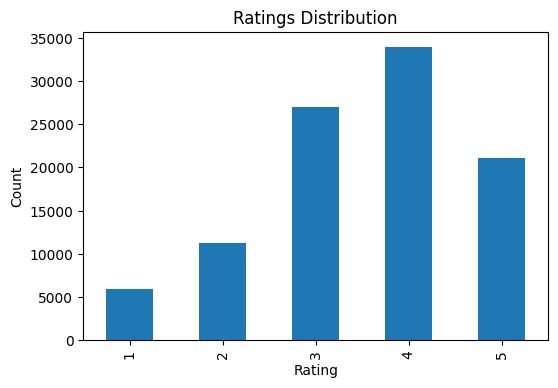

In [76]:
# Ratings distribution

plt.figure(figsize=(6,4))
final_data['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


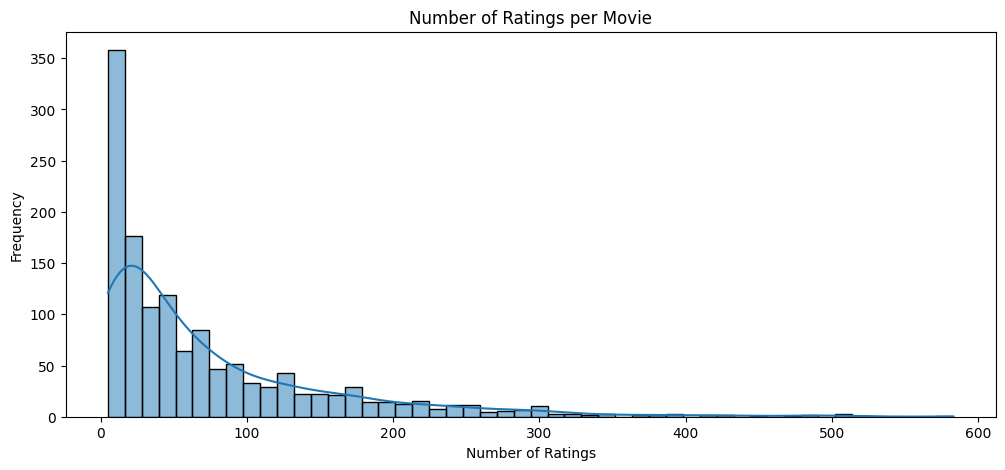

Top 5 movies with most ratings:
 movie_id
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64


In [14]:
# Ratings per movie
movie_ratings_count = final_data.groupby('movie_id')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.histplot(movie_ratings_count, bins=50, kde=True)
plt.title("Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()
print("Top 5 movies with most ratings:\n", movie_ratings_count.head())

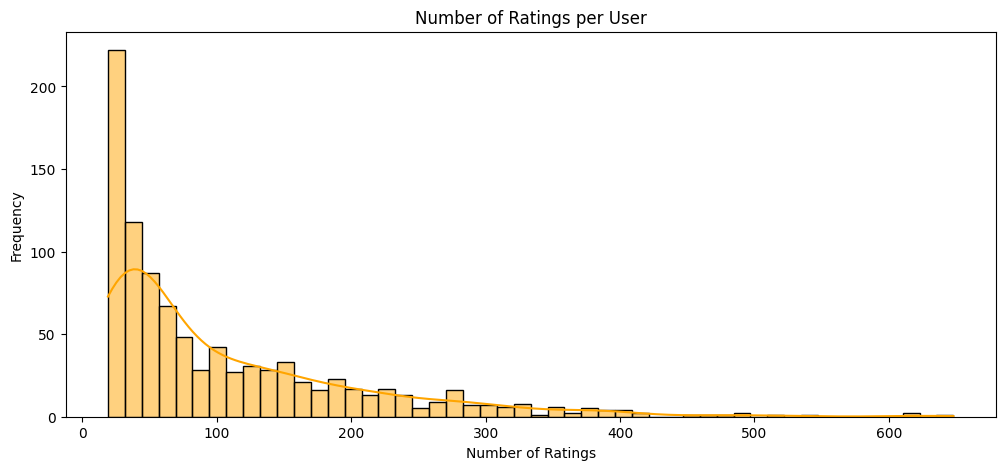

Top 5 users with most ratings:
 user_id
405    648
655    621
13     614
450    535
276    516
Name: rating, dtype: int64


In [17]:
# Ratings per user
user_ratings_count = final_data.groupby('user_id')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.histplot(user_ratings_count, bins=50, kde=True, color='orange')
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()
print("Top 5 users with most ratings:\n", user_ratings_count.head())

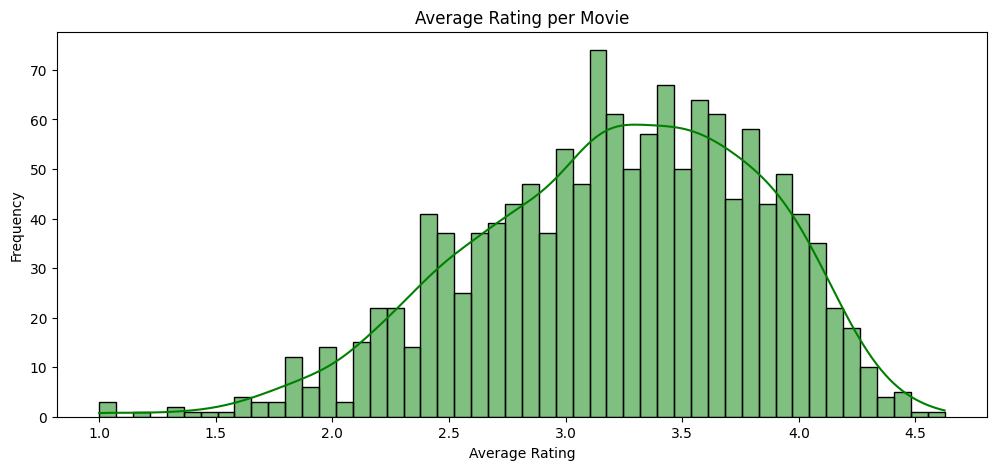

In [18]:
# Average rating per movie
avg_ratings = final_data.groupby('movie_id')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.histplot(avg_ratings, bins=50, kde=True, color='green')
plt.title("Average Rating per Movie")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2888\260310999.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index, y=genre_count.values, palette='magma')


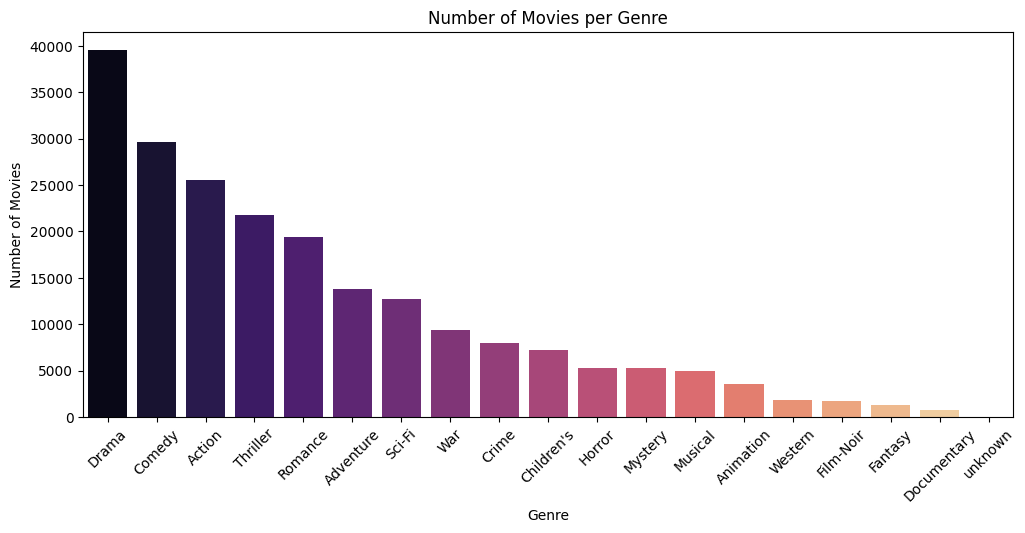

In [19]:
# Genre distribution
genre_cols = ["unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
              "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
              "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
genre_count = final_data[genre_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=genre_count.index, y=genre_count.values, palette='magma')
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

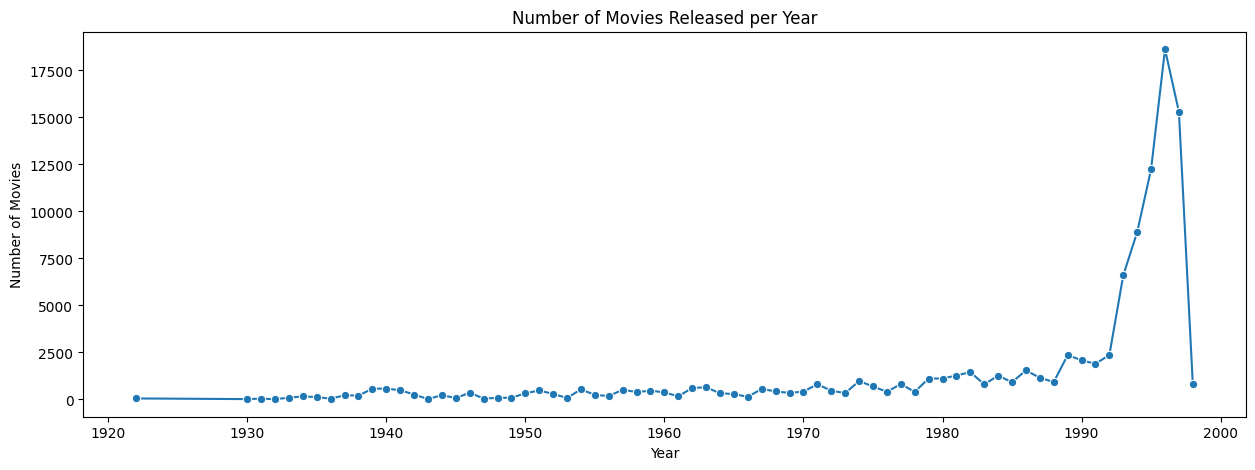

In [20]:
# Movies released per year
year_count = final_data['year'].value_counts().sort_index()
plt.figure(figsize=(15,5))
sns.lineplot(x=year_count.index, y=year_count.values, marker='o')
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2888\3003741114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=final_data, palette='pastel')


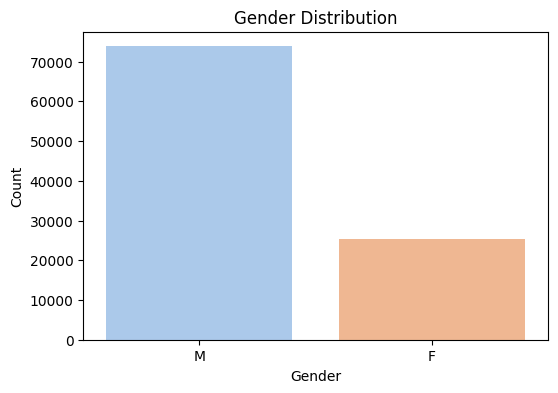

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=final_data, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

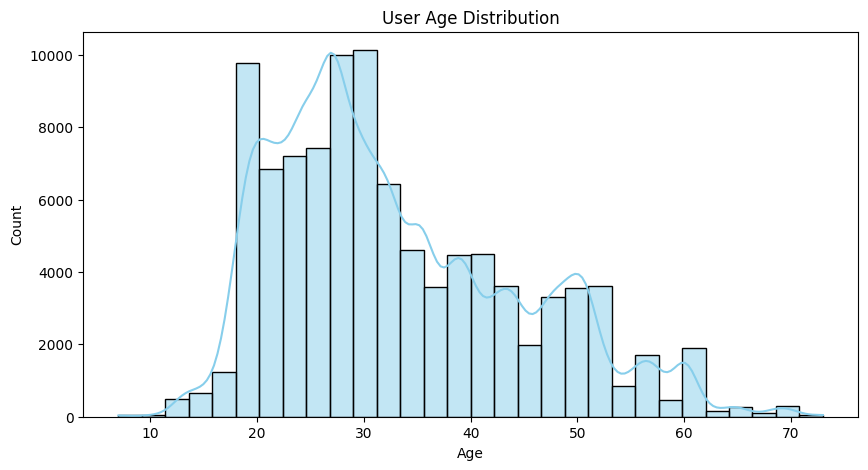

In [22]:
# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(final_data['age'], bins=30, kde=True, color='skyblue')
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2888\142232406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='rating', data=final_data, palette='Set2')


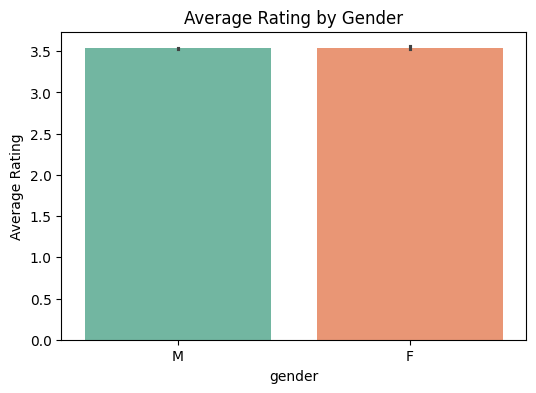

In [25]:
# Average rating by gender

plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='rating', data=final_data, palette='Set2')
plt.title("Average Rating by Gender")
plt.ylabel("Average Rating")
plt.show()

In [ ]:
final_data.head()